In [116]:
# Импортируем необходимые библиотеки:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Загружаем датасет, который будем исследовать: 
ads_data = pd.read_csv('adv_dataset.csv')

In [117]:
# Выведем первые 5 строк:
ads_data.head()

,ad_id,time,event,ad_cost_type,has_video,client_union_id,platform,ad_cost,target_audience_count,user_id
0,10,2023-08-13 10:49:09,view,CPC,1,208,android,133.668942,797949,45501
1,1,2023-08-08 21:23:39,view,CPC,0,737,ios,798.861819,440704,28638
2,5,2023-08-04 19:05:19,view,CPM,1,836,android,831.531497,125561,42440
3,4,2023-08-19 06:01:34,view,CPM,1,773,ios,999.279972,812065,11164
4,12,2023-08-08 19:02:10,view,CPC,0,926,android,900.295622,546167,29691


In [118]:
# Изучим данные, посмотрим количество колонок и cтрок в датасете:
ads_data.shape

(1200000, 10)

In [119]:
# Посмотрим, какие типы данных в них содержатся: 
ads_data.dtypes

ad_id                      int64
time                      object
event                     object
ad_cost_type              object
has_video                  int64
client_union_id            int64
platform                  object
ad_cost                  float64
target_audience_count      int64
user_id                    int64
dtype: object

In [120]:
# Приведем колонку "time" к типу данных datetime: 
ads_data['time'] = pd.to_datetime(ads_data.time)
ads_data.dtypes

ad_id                             int64
time                     datetime64[ns]
event                            object
ad_cost_type                     object
has_video                         int64
client_union_id                   int64
platform                         object
ad_cost                         float64
target_audience_count             int64
user_id                           int64
dtype: object

In [121]:
# Создадим отедельную колонку "date", которая содержит только дату и приведем к типу данных datetime:
ads_data['date'] = ads_data.time.dt.date
ads_data['date'] = pd.to_datetime(ads_data.date)
ads_data.dtypes

ad_id                             int64
time                     datetime64[ns]
event                            object
ad_cost_type                     object
has_video                         int64
client_union_id                   int64
platform                         object
ad_cost                         float64
target_audience_count             int64
user_id                           int64
date                     datetime64[ns]
dtype: object

In [122]:
# Проверим наличие пропущенных значений в колонках:
ads_data.isna().sum()

ad_id                    0
time                     0
event                    0
ad_cost_type             0
has_video                0
client_union_id          0
platform                 0
ad_cost                  0
target_audience_count    0
user_id                  0
date                     0
dtype: int64

In [123]:
# Проверим наличие дубликатов: 
ads_data.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
1199995    False
1199996    False
1199997    False
1199998    False
1199999    False
Length: 1200000, dtype: bool

In [191]:
# Чтобы убедиться, что с данными все в порядке, проведем несколько логических проверок.
# Проверим, нет ли объявлений, которые приходят с кликами, но без показов:
ads_data_by_ad = ads_data_by_ad.fillna(0)
ads_data_by_ad.query('click == 0').shape

(0, 5)

In [192]:
# Проверим, есть ли такие объявления, по которым сначала произошел клик и только потом показ:
ads_data.groupby(['ad_id' , 'event'] , as_index=False) \
    .agg({'time':'min'}) \
    .pivot(index='ad_id', columns='event', values = 'time').reset_index() \
    .query('click < view') 

event,ad_id,click,view


In [124]:
# Посмотрим статистику рекламных объявлений по дням.
# Посчитаем число всех событий по дням, число показов, число кликов, число уникальных объявлений и уникальных кампаний:
ads_data.groupby('date') \
    .agg({'ad_id':'count'})

,ad_id
date,
2023-08-01,39930
2023-08-02,40296
2023-08-03,40004
2023-08-04,40121
2023-08-05,39692
2023-08-06,39905
2023-08-07,39866
2023-08-08,40049
2023-08-09,39664


<Axes: xlabel='date'>

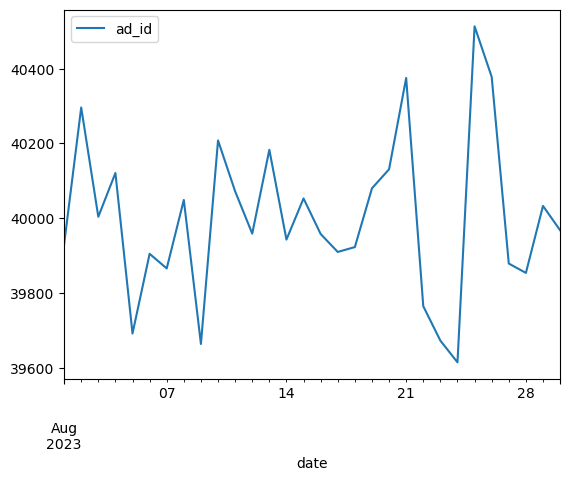

In [125]:
# Представим результат в виде графика:
ads_data.groupby('date') \
        .agg({'ad_id':'count'}).plot()

In [194]:
# Посчитаем количество просмотров и кликов по дням:
ads_data.groupby(['date','event'], as_index = False) \
        .agg({'ad_id':'count'})

,date,event,ad_id
0,2023-08-01,click,2009
1,2023-08-01,view,37921
2,2023-08-02,click,1979
3,2023-08-02,view,38317
4,2023-08-03,click,2059
5,2023-08-03,view,37945
6,2023-08-04,click,2021
7,2023-08-04,view,38100
8,2023-08-05,click,1998
9,2023-08-05,view,37694


In [248]:
# Для удобства восприятия изменим структуру таблицы:
ads_data.groupby(['date', 'event'], as_index=False) \
    .agg({'ad_id':'count'})\
    .pivot(index = 'date', columns = 'event' , values =  'ad_id').reset_index()

event,date,click,view
0,2023-08-01,2009,37921
1,2023-08-02,1979,38317
2,2023-08-03,2059,37945
3,2023-08-04,2021,38100
4,2023-08-05,1998,37694
5,2023-08-06,1928,37977
6,2023-08-07,2044,37822
7,2023-08-08,2016,38033
8,2023-08-09,1988,37676
9,2023-08-10,2126,38082


In [130]:
# Посчитаем число уникальных объявлений и кампаний по дням:
ads_data.groupby(['date'], as_index = False) \
        .agg({'ad_id':'nunique', 'client_union_id': 'nunique'})

,date,ad_id,client_union_id
0,2023-08-01,15,1000
1,2023-08-02,15,1000
2,2023-08-03,15,1000
3,2023-08-04,15,1000
4,2023-08-05,15,1000
5,2023-08-06,15,1000
6,2023-08-07,15,1000
7,2023-08-08,15,1000
8,2023-08-09,15,1000
9,2023-08-10,15,1000


In [131]:
# Найдем ТОП-10 объявлений по CTR. CTR - отношение всех просмотрв объявлений и кликов.
# Найдем для каждого ad_id кол-во кликов и кол-во просмотров и сохраним в дф ads_data_by_ad:
ads_data_by_ad = ads_data.groupby(['ad_id', 'event'], as_index=False) \
                            .agg({'time':'count'})\
                            .pivot(index = 'ad_id', columns = 'event' , values =  'time').reset_index()

# рассчитаем CTR и найдем ТОП-10: 
ads_data_by_ad['ctr'] = ads_data_by_ad['click']/ ads_data_by_ad['view']
ads_data_by_ad['ctr_per'] = 100 * ads_data_by_ad['click'] / ads_data_by_ad['view']

ads_data_by_ad.sort_values('ctr' , ascending = False).head(10)

event,ad_id,click,view,ctr,ctr_per
10,11,4096,76118,0.053811,5.381119
1,2,4086,76179,0.053637,5.363683
6,7,4063,75896,0.053534,5.353378
0,1,4042,75899,0.053255,5.325498
9,10,4071,76483,0.053228,5.322751
2,3,4001,75544,0.052963,5.296251
5,6,4010,75733,0.052949,5.294918
12,13,4007,75716,0.052921,5.292144
4,5,4035,76318,0.052871,5.287088
7,8,3992,75825,0.052648,5.264754


In [132]:
# Посмотрим отличается ли средний и медианный CTR в данных:
# среднее значение:
ads_data_by_ad.ctr.mean()

0.05291671766269566

In [133]:
# медианное значение:
ads_data_by_ad.ctr.median()

0.0529214432880765

D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


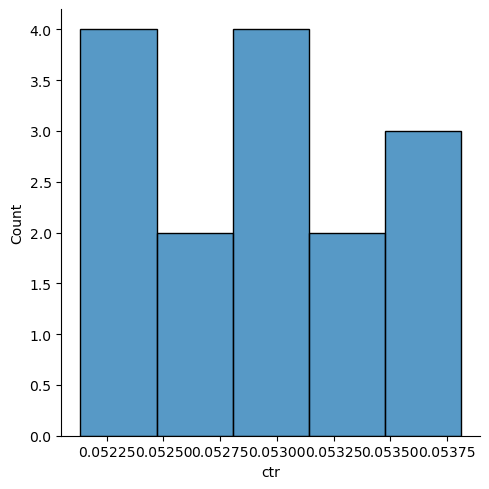

In [134]:
# Посмотрим как распределен CTR:
sns.displot(ads_data_by_ad.ctr, kde= False)

In [136]:
# Посмотрим есть ли разница между площадками:
ads_data \
    .groupby('platform' , as_index=False)\
    .agg({'ad_id':'count'})\
    .sort_values('ad_id')

,platform,ad_id
0,android,599951
1,ios,600049


In [178]:
# Есть ли различия у CTR в объявлениях с видео и без.
# Рассмотрим объявления без видео:
ads_data_without_video = ads_data.query('has_video == 0') \
                                    .groupby(['date', 'event']) \
                                    .agg({'ad_id':'count'}) \
                                    .pivot_table(index='date', columns = 'event', values = 'ad_id') \
                                    .reset_index()
# Посчитаем CTR:
ads_data_without_video['ctr'] = ads_data_without_video['click']/ads_data_without_video['view']
ads_data_without_video['ctr_per'] = 100* ads_data_without_video['click']/ads_data_without_video['view']
ads_data_without_video

event,date,click,view,ctr,ctr_per
0,2023-08-01,1020.0,18985.0,0.053727,5.372663
1,2023-08-02,996.0,19224.0,0.051810,5.181024
2,2023-08-03,1045.0,19057.0,0.054835,5.483549
3,2023-08-04,1020.0,19024.0,0.053616,5.361648
4,2023-08-05,1022.0,18908.0,0.054051,5.405120
5,2023-08-06,948.0,19043.0,0.049782,4.978207
6,2023-08-07,1027.0,19005.0,0.054038,5.403841
7,2023-08-08,1034.0,18900.0,0.054709,5.470899
8,2023-08-09,1022.0,18667.0,0.054749,5.474902
9,2023-08-10,1071.0,19238.0,0.055671,5.567107


In [182]:
# Рассмотрим объявления без видео:
ads_data_without_video = ads_data.query('has_video == 0') \
                                    .groupby(['date', 'event']) \
                                    .agg({'ad_id':'count'}) \
                                    .pivot_table(index='date', columns = 'event', values = 'ad_id') \
                                    .reset_index()
# Посчитаем CTR:
ads_data_without_video['ctr'] = ads_data_without_video['click']/ads_data_without_video['view']
ads_data_without_video['ctr_per'] = 100* ads_data_without_video['click']/ads_data_without_video['view']
ads_data_without_video

# Посмотрим на медиану ctr:
ads_data_without_video.ctr.quantile(q=0.5)

0.05286317625877633

In [183]:
# Рассмотрим объявления с видео:
ads_data_with_video = ads_data.query('has_video == 1') \
                                    .groupby(['date', 'event']) \
                                    .agg({'ad_id':'count'}) \
                                    .pivot_table(index='date', columns = 'event', values = 'ad_id') \
                                    .reset_index()
# Посчитаем CTR:
ads_data_with_video['ctr'] = ads_data_with_video['click']/ads_data_with_video['view']
ads_data_with_video['ctr_per'] = 100* ads_data_with_video['click']/ads_data_with_video['view']

# Посмотрим на медиану ctr:
ads_data_with_video.ctr.quantile(q=0.5)

0.05235143631552991

In [243]:
# Посчитаем стоимость платных объявлений за все время.
# По модели CPC списываем с клиента деньги, если произошел клик.
# По модели CPM списываем с клиента деньги за каждую 1 000 показов.

# Для модели CPC:
sum_cpc = ads_data[(ads_data.ad_cost_type == 'CPC') & (ads_data.event == 'click')].ad_cost.sum() #ad_cost - стоиомость взаимодействия

# Аналогично посчитаем для CPM:
sum_cpm = ads_data[(ads_data.ad_cost_type == 'CPM') & (ads_data.event == 'view')].ad_cost.sum() / 1000

# Сумма всех платных взаимодействий:
total_sum = sum_cpc + sum_cpm 
round(total_sum, 2)

15485494.41

In [244]:
# Рассчитаем заработок по дням. В какой день платформа заработал больше/меньше всего? 
# По модели CPC списываем с клиента деньги, если произошел клик.
# По модели CPM списываем с клиента деньги за каждую 1 000 показов.

# Cтоимость платных объявлений по дням при оплате CPC:

revenue_cpc = ads_data.query('ad_cost_type == "CPC" and event == "click"') \
                        .groupby('date') \
                        .agg({'ad_cost':'sum'}) \
                        .rename(columns = {'ad_cost':'cpc'})
revenue_cpc.head()

,cpc
date,
2023-08-01,511940.563650
2023-08-02,488914.171809
2023-08-03,525633.681922
2023-08-04,517395.123746
2023-08-05,507876.590292


In [245]:
# Cтоимость платных объявлений по дням при оплате CPM:

revenue_cpm = ads_data.query('ad_cost_type == "CPM" and event == "view"') \
                        .groupby('date') \
                        .agg({'ad_cost':'sum'}) \
                        .div(1000) \
                        .rename(columns = {'ad_cost':'cpm'})
revenue_cpm.head()

,cpm
date,
2023-08-01,9546.747401
2023-08-02,9690.908253
2023-08-03,9527.823109
2023-08-04,9684.565498
2023-08-05,9567.493805


In [250]:
# Общая стоимость:
total_revenue = revenue_cpm.merge(revenue_cpc, on = 'date')
total_revenue['sum'] = total_revenue.cpm + total_revenue.cpc
total_revenue.sort_values('sum', ascending=False)

,cpm,cpc,sum
date,,,
2023-08-08,9521.575740,532357.074258,541878.649999
2023-08-07,9422.479534,530190.555361,539613.034895
2023-08-26,9671.037358,528467.852954,538138.890313
2023-08-15,9529.547254,526006.541329,535536.088583
2023-08-03,9527.823109,525633.681922,535161.505031
2023-08-16,9635.348610,525161.548298,534796.896908
2023-08-24,9456.572239,524127.697856,533584.270095
2023-08-29,9427.718070,519778.004537,529205.722608
2023-08-30,9511.928162,519689.667452,529201.595614


In [239]:
# Какая платформа самая популярная для размещения рекламы ? Сколько процентов показов приходится на каждую из платформ? 
# Кол-во показов на всех платформах:
ads_data.query('event == "view"')['ad_id'].count()

# Кол-во показов на android:
ads_data.query('event == "view" and platform == "android"')['ad_id'].count()

# Кол-во показов на ios:
ads_data.query('event == "view" and platform == "ios"')['ad_id'].count()

569772

In [240]:
# Сколько процентов составляют показы на android:
round(100 * ads_data.query('event == "view" and platform == "android"')['ad_id'].count() / ads_data.query('event == "view"')['ad_id'].count(), 2)

50.01

In [237]:
# Сколько процентов составляют показы на ios:
round(100 * ads_data.query('event == "view" and platform == "ios"')['ad_id'].count() / ads_data.query('event == "view"')['ad_id'].count(), 2)

49.99